Download the dataset from [here](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)




In [ ]:
#Importing python libraries
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sci
import matplotlib.pyplot as mp

In [ ]:
data = pd.read_csv("master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


The column "suicides/100k" is Suicide rate/100k persons on the whole population

In [ ]:
# checking the age group distribution
print(data.age.value_counts())
print("\nAverage suicide rates by age group")
print(data.groupby(['age'])['suicides/100k pop'].mean())

age
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

Average suicide rates by age group
age
15-24 years     8.947154
25-34 years    12.186885
35-54 years    14.947441
5-14 years      0.620041
55-74 years    16.155579
75+ years      23.955409
Name: suicides/100k pop, dtype: float64


In [ ]:
# Gender distribution
M = data[data.sex == "male"]
F = data[data.sex == "female"]

print("Male Suicides =", M.suicides_no.sum(), "in a male population of", M.population.sum())
print("Female Suicides =", F.suicides_no.sum(), "in a female population of", F.population.sum())

Male Suicides = 5188910 in a male population of 25049376579
Female Suicides = 1559510 in a female population of 26272781857


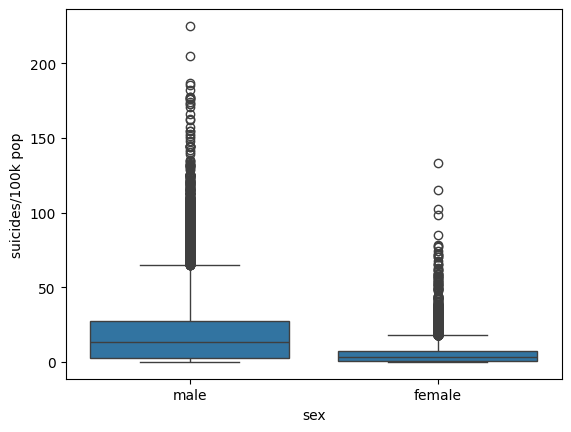

In [ ]:
sb.boxplot(x='sex',y='suicides/100k pop', data=data)
mp.show()

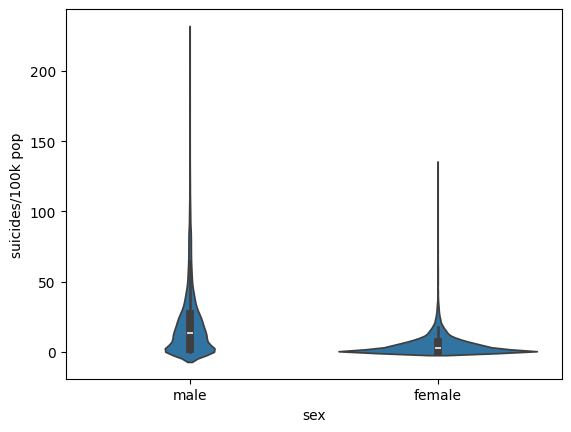

In [ ]:
sb.violinplot(x='sex',y='suicides/100k pop', data=data)
mp.show()

In [ ]:
suicide_mean_by_country=pd.DataFrame(data.groupby(['country'])['suicides/100k pop'].mean())
suicide_mean_by_country = suicide_mean_by_country.sort_values(by='suicides/100k pop', ascending=False)
suicide_mean_by_country

,suicides/100k pop
country,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
...,...
Oman,0.736111
Antigua and Barbuda,0.552901
Jamaica,0.521765


In [ ]:
suicide_median_by_country=pd.DataFrame(data.groupby(['country'])['suicides/100k pop'].quantile(0.5))
suicide_median_by_country = suicide_median_by_country.sort_values(by='suicides/100k pop', ascending=False)
suicide_median_by_country

,suicides/100k pop
country,
Sri Lanka,22.990
Lithuania,22.910
Russian Federation,19.125
Latvia,18.160
Hungary,17.785
...,...
Saint Kitts and Nevis,0.000
Qatar,0.000
Montenegro,0.000


The data above shows that the mean suicide rate of Lithuania is higher than Sri Lanka but the median of the rates is close. So we will use Hypothesis testing to decide the country with highest suicide rates.

**NULL HYPOTHESIS** — There is no significant difference between suicide rates of Lithuania and Sri Lanka. \\
**ALTERNATE HYPOTHESIS** — There is significant difference between suicide rates of Lithuania and Sri Lanka.

**TEST STATISTIC** — Difference of Medians of suicide rates of Lithuania and Sri Lanka. *italicized text*

In [ ]:
lithuania = data[data.country == "Lithuania"]
sl=data[data.country=='Sri Lanka']

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23900,Sri Lanka,1985,male,75+ years,144,115000,125.22,Sri Lanka1985,0.597,"5,978,460,972",431,G.I. Generation
23901,Sri Lanka,1985,male,15-24 years,1432,1673000,85.59,Sri Lanka1985,0.597,"5,978,460,972",431,Generation X
23902,Sri Lanka,1985,male,25-34 years,1024,1288000,79.50,Sri Lanka1985,0.597,"5,978,460,972",431,Boomers
23903,Sri Lanka,1985,male,55-74 years,443,680000,65.15,Sri Lanka1985,0.597,"5,978,460,972",431,G.I. Generation
23904,Sri Lanka,1985,female,15-24 years,943,1652000,57.08,Sri Lanka1985,0.597,"5,978,460,972",431,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
24027,Sri Lanka,2006,female,25-34 years,194,1594072,12.17,Sri Lanka2006,NaN,"28,267,410,543",1580,Generation X
24028,Sri Lanka,2006,female,55-74 years,111,1344897,8.25,Sri Lanka2006,NaN,"28,267,410,543",1580,Silent
24029,Sri Lanka,2006,female,35-54 years,198,2603293,7.61,Sri Lanka2006,NaN,"28,267,410,543",1580,Boomers
24030,Sri Lanka,2006,male,5-14 years,15,1650300,0.91,Sri Lanka2006,NaN,"28,267,410,543",1580,Millenials


In [ ]:
# Draw random n samples, sl only has 132 entries so dont exceed that
n_samples = 100
sample_lithuania = lithuania.sample(n_samples)
sample_sl = sl.sample(n_samples)

S1=np.array(sample_lithuania['suicides/100k pop'])
median1=np.median(S1)
print("median1:",median1)

S2=np.array(sample_sl['suicides/100k pop'])
median2=np.median(S2)
print("median2:",median2)

TS= median1-median2
print("Test Statistic is (Median of Lithuania - Median of Sri Lanka)=", TS)

median1: 23.61
median2: 28.325
Test Statistic is (Median of Lithuania - Median of Sri Lanka)= -4.715


In [ ]:
# Merge the two sample sets and shuffle
S= np.concatenate((S1,S2), axis=None)
np.random.shuffle(S)

In [ ]:
#Randomly divide the set S into two and check the diff. between median of each set, do this n_times
n_times = 500
medianlist=np.zeros(n_times)

for i in range(n_times):
    _s1= np.random.choice(S,n_samples)
    _s2= np.setdiff1d(S, _s1)
    _median1= np.median(_s1)
    _median2= np.median(_s2)
    medianlist[i]= np.array(_median1 - _median2)

In [ ]:
#p value calculation

ext=0

for obs in medianlist:
    if obs > TS:
        ext+=1

pvalue= ext/n_times

print("P-value:",pvalue)
if pvalue>0.05:
    print('OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF {} IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue))
    print('SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND SRI LANKA HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
else:
    print('OBSERVATION VALUE IS HIGHER THAN THE 95th Percentile.\nTHUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS Extremely Low, AS P-VALUE OF {} IS LOWER THAN THE SIGNIFICANCE LEVEL OF 0.05'.format(pvalue))
    print('SO WE REJECT THE NULL HYPOTHESIS AND ACCEPT THE ALTERNATE HYPOTHESIS : LITHUANIA AND SRI LANKA HAVE A SIGNIFICANT DIFFERENCE IN SUICIDE RATES')
    if TS > 0:
        print('FROM THE SIGN OF TS WE KNOW LITHUANIA HAS A HIGHER SUICIDE RATE')
    else:
        print('FROM THE SIGN OF TS WE KNOW SRI LANKA HAS A HIGHER SUICIDE RATE')

P-value: 0.618
OBSERVATION VALUE IS LOWER THAN THE 95th Percentile.
THUS probability of OCCURENCE OF OUR OBSERVATION GIVEN NULL HYPOTHESIS IS High, AS P-VALUE OF 0.618 IS HIGHER THAN THE SIGNIFICANCE LEVEL OF 0.05
SO WE ACCEPT THE NULL HYPOTHESIS AS TRUE : LITHUANIA AND SRI LANKA HAVE NO SIGNIFICANT DIFFERENCE IN SUICIDE RATES



## We will now use Spearman's Rank correlation coefficient to check the relation between GDP and suicide rates.

In [ ]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
age_values = data['age'].unique()
print(age_values)

country_values = data['country'].unique()
print(len(country_values))

['15-24 years' '35-54 years' '75+ years' '25-34 years' '55-74 years'
 '5-14 years']
101


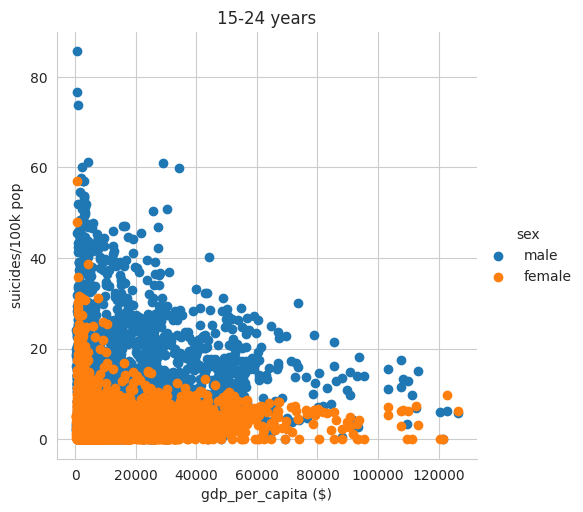

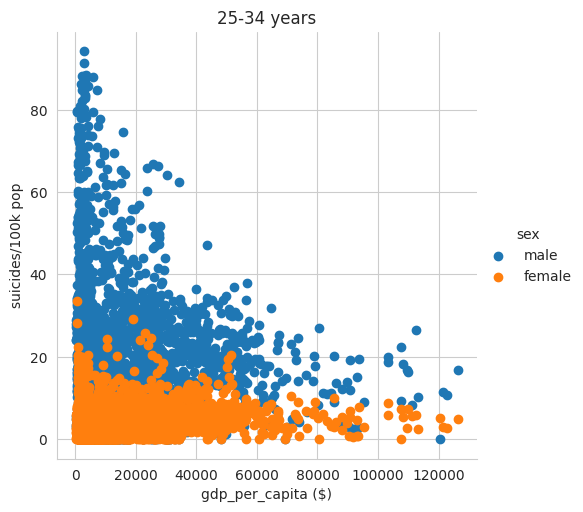

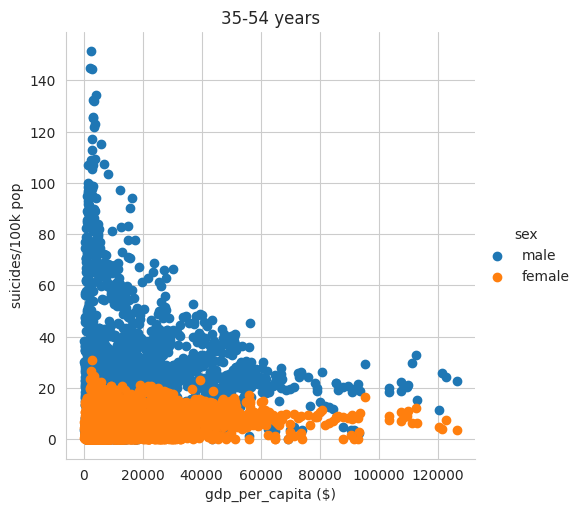

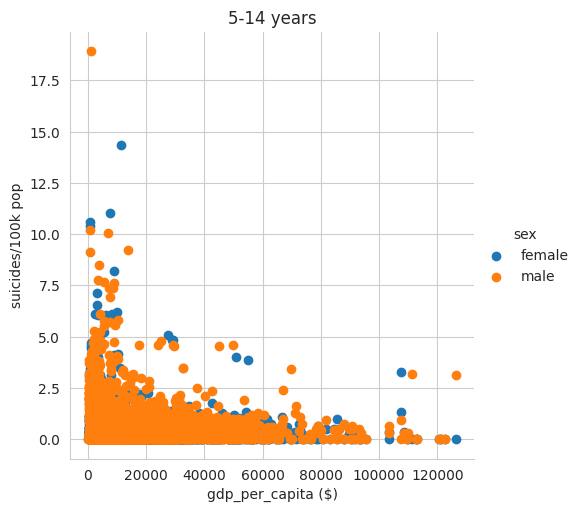

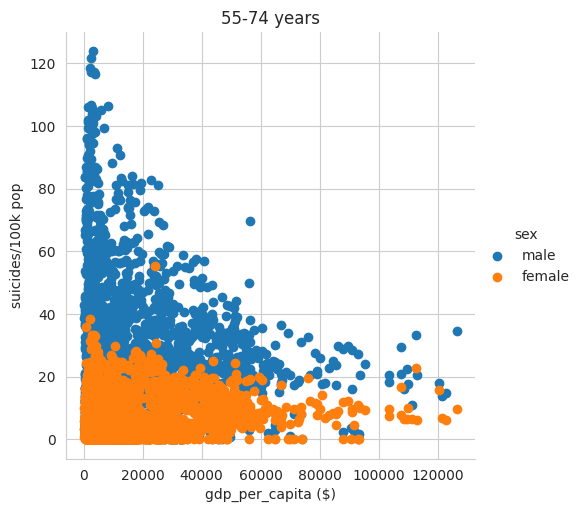

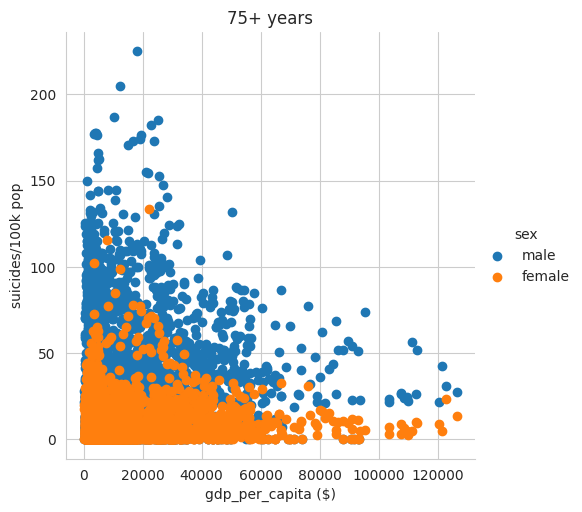

In [ ]:
age_values = sorted(age_values)

for age_group in age_values:
  age_data = data[data.age == age_group]
  sb.set_style("whitegrid");
  sb.FacetGrid(age_data, hue='sex', height=5) \
    .map(mp.scatter, "gdp_per_capita ($)", "suicides/100k pop") \
    .add_legend();
  mp.title(age_group)
  mp.show();

In [ ]:
for age_group in age_values:
  age_data = data[data.age == age_group]
  print("The spearman statistic and p-value for age group ",age_group,"are as follows:",sci.stats.spearmanr(age_data['gdp_per_capita ($)'],age_data['suicides/100k pop'] ))

The spearman statistic and p-value for age group  15-24 years are as follows: SignificanceResult(statistic=-0.007046659223596717, pvalue=0.6312407417699475)
The spearman statistic and p-value for age group  25-34 years are as follows: SignificanceResult(statistic=0.0936469315164842, pvalue=1.6297404505901945e-10)
The spearman statistic and p-value for age group  35-54 years are as follows: SignificanceResult(statistic=0.1690685598668204, pvalue=4.144502810705675e-31)
The spearman statistic and p-value for age group  5-14 years are as follows: SignificanceResult(statistic=-0.16081774476923122, pvalue=4.381154187347501e-28)
The spearman statistic and p-value for age group  55-74 years are as follows: SignificanceResult(statistic=0.14078055044073637, pvalue=5.571939552827093e-22)
The spearman statistic and p-value for age group  75+ years are as follows: SignificanceResult(statistic=0.10607524884952993, pvalue=4.3038326856836297e-13)




##Clearly the spearman statistic is close to zero indicating no correlation between GDP per capita and Suicide rate.
